In [73]:
## Import modules & Load Dataset
import pandas as pd
# 매출 데이터 load
mamm_feature = pd.read_csv("../../../resources/processedData/매머드_feature.csv", index_col =False)

In [74]:
mamm_feature

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44
...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54


In [55]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

def clustering(data, col):
    # 결과 저장할 컬럼명 지정
    result = col+"_cl"
    
    scaled_Data = MinMaxScaler().fit_transform(data[col].values.reshape(-1,1))
    # kElbow cluster 진행
    Kelbow_model = KMeans(random_state=10)
    visualizer = KElbowVisualizer(Kelbow_model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: "+col, timings=False)
    visualizer.fit(scaled_Data)
    visualizer.show()
    
    # 최적 k로 다시 진행
    optimal_k = visualizer.elbow_value_
    
    # 모델 선언
    optimal_model = KMeans(n_clusters = optimal_k, random_state=10)
    import matplotlib.pyplot as plt
    # 데이터에 학습 
    optimal_model.fit(scaled_Data)
    
    # 결과 저장
    data[result] = optimal_model.fit_predict(scaled_Data)
    
    # 산점도
    plt.scatter(data[result]+1, data[col])
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    #plt.xlabel("sepal_length")
    plt.ylabel(col)
    plt.xlabel("군집")
    plt.show()

    # boxplot
    c1 = data[data[result]== 0][col].to_list()
    c2 = data[data[result]== 1][col].to_list()
    c3 = data[data[result] == 2][col].to_list()

    value = [c1, c2, c3]
    plt.boxplot(value) # vert: 가로/세로 상자그림
    plt.title('강남구 매머드커피 '+ col+ ' 군집별 동향', fontsize=15)
    plt.show()

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

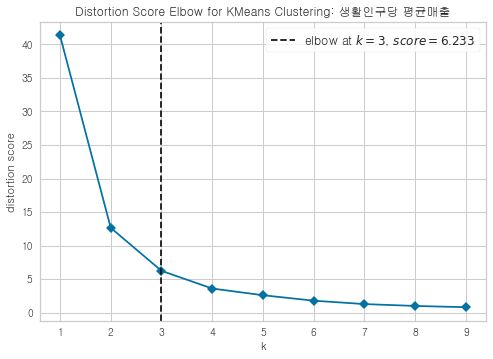

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


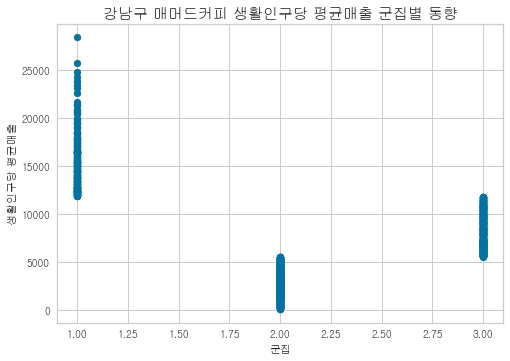

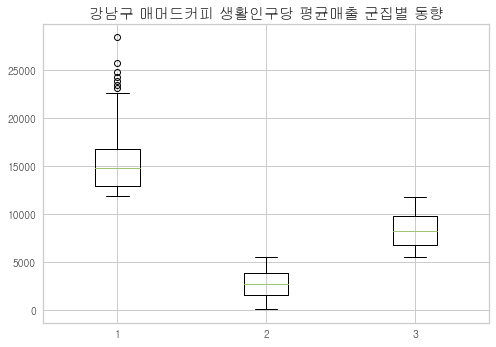

In [56]:
clustering(mamm_feature,"생활인구당 평균매출")

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

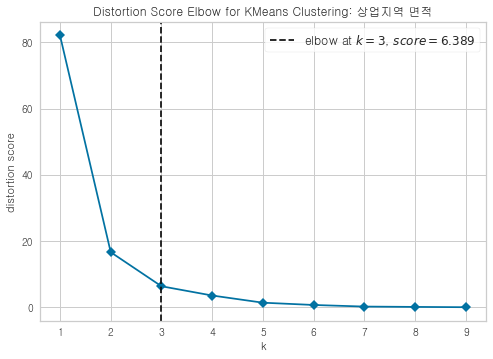

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


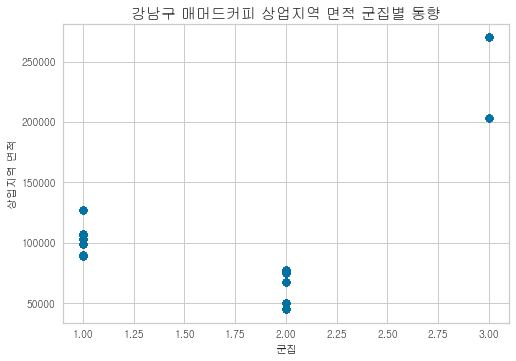

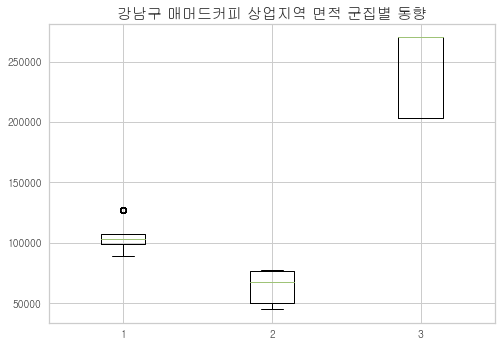

In [57]:
clustering(mamm_feature,"상업지역 면적")

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

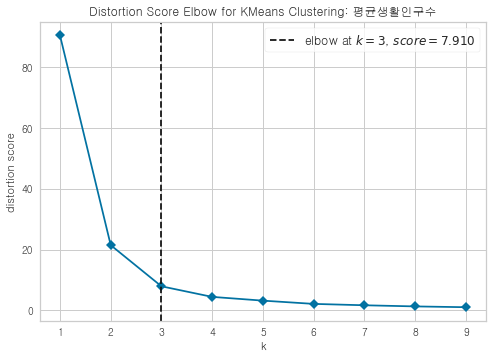

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


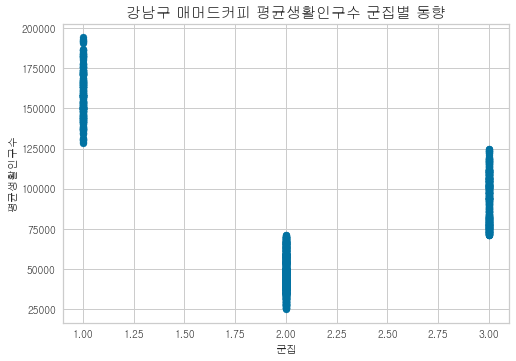

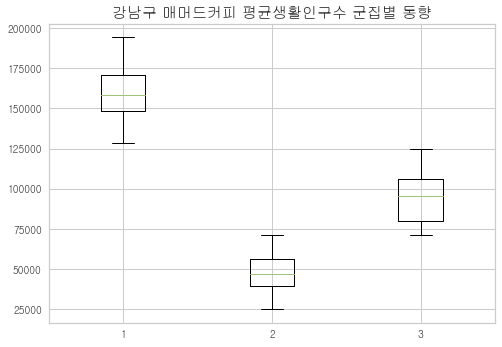

In [58]:
clustering(mamm_feature,"평균생활인구수")

In [59]:
mamm_feature

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,생활인구당 평균매출_cl,상업지역 면적_cl,평균생활인구수_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,1,2,2
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,1,2,0
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,1,2,0
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,2,2,2
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,1,0,2
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,2,0,2
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,0,0,0
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,2,0,0


In [75]:
# 생활인구당 평균 매출 아웃라이어(28440.89, 최고값) 삭제 - T61943_20190206_1, MMTH 한티역점(122호)

mamm_feature_droped = mamm_feature.drop(mamm_feature[mamm_feature["생활인구당 평균매출"] == mamm_feature["생활인구당 평균매출"].max()].index)
mamm_feature_droped

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44
...,...,...,...,...,...,...,...,...,...,...
1426,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55
1427,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97
1428,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65
1429,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54


c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

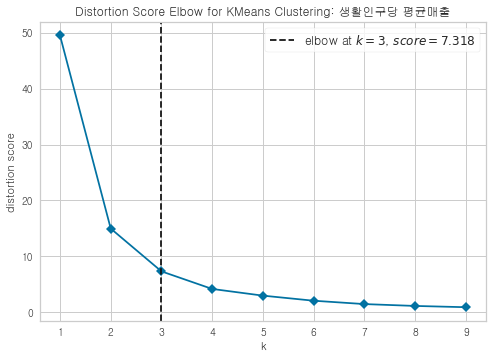

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


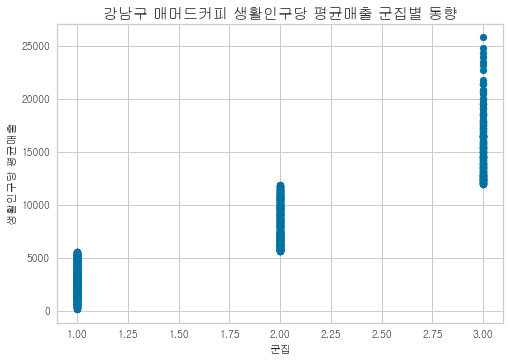

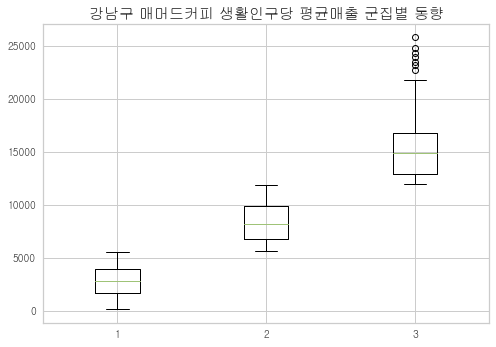

In [76]:
clustering(mamm_feature_droped,"생활인구당 평균매출")

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

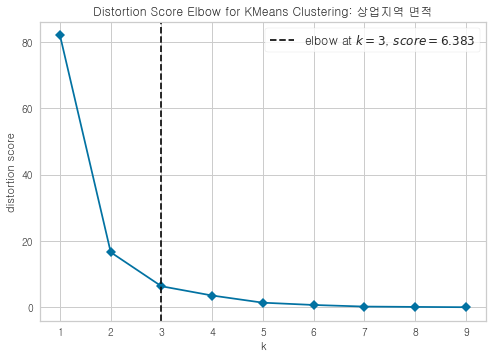

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


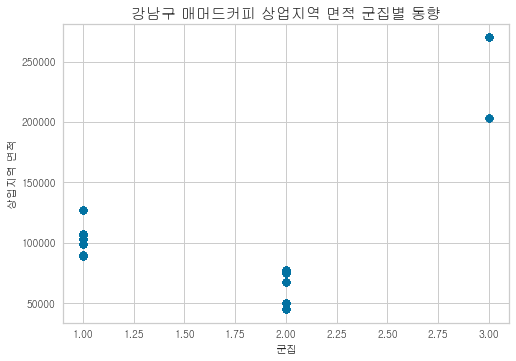

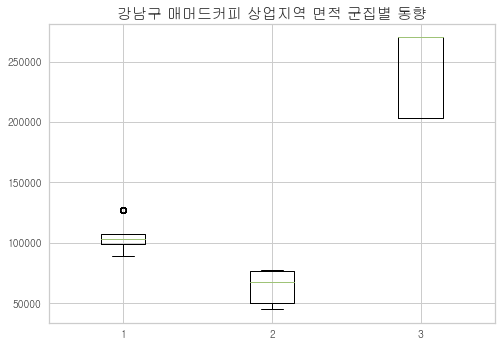

In [77]:
clustering(mamm_feature_droped,"상업지역 면적")

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

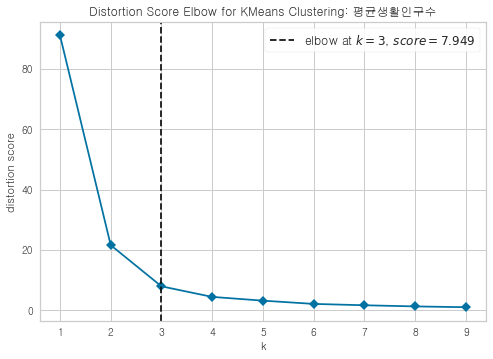

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


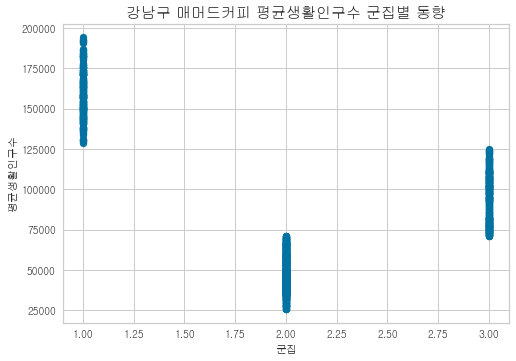

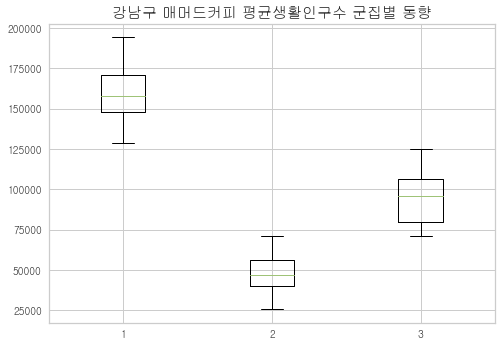

In [78]:
clustering(mamm_feature_droped,"평균생활인구수")